<a href="https://colab.research.google.com/github/anwarsan/Data-Science/blob/main/Data%20Preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Source: https://codesource.io/data-preprocessing-for-machine-learning/
# importing libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# import dataset
# Download it here: https://drive.google.com/file/d/14ndPjFsBCCw3Ui8wq6bWsELKUA-v_-_d/view?usp=sharing
dataset = pd.read_csv('/content/drive/MyDrive/Startup Campus/sample_data.csv')
print(dataset)

    Country   Age   Salary Purchased
0    France  44.0  72000.0        No
1     Spain  27.0  48000.0       Yes
2   Germany  30.0  54000.0        No
3     Spain  38.0  61000.0        No
4   Nigeria  18.0  15000.0        No
5   Germany  40.0      NaN       Yes
6    France  35.0  58000.0       Yes
7     Spain   NaN  52000.0        No
8    France  48.0  79000.0       Yes
9   Germany  50.0  83000.0        No
10   France  37.0  67000.0       Yes
11  Nigeria  50.0  60000.0       Yes
12   France  22.0  30000.0        No
13      NaN  44.0  45000.0       Yes
14   France  47.0  78000.0       NaN
15  Nigeria  35.0  43000.0       Yes
16    Spain  34.0  44000.0       Yes
17    Spain  27.0  48000.0       Yes
18    Spain  33.0  48000.0       Yes
19  Nigeria  29.0  77000.0       Yes
20    Spain   NaN  57000.0       Yes
21   France  44.0  48000.0       Yes
22  Germany  50.0  83000.0        No
23   France  37.0  67000.0       Yes
24   France  37.0  23000.0       Yes
25  Germany  45.0  50000.0        No
2

In [ ]:
dataset.shape

(29, 4)

# Checking data type

In [ ]:
dataset.dtypes

Country       object
Age          float64
Salary       float64
Purchased     object
dtype: object

In [ ]:
#looking at dataset information
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29 entries, 0 to 28
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Country    28 non-null     object 
 1   Age        27 non-null     float64
 2   Salary     28 non-null     float64
 3   Purchased  28 non-null     object 
dtypes: float64(2), object(2)
memory usage: 1.0+ KB


In [ ]:
#dataset['Age']=dataset['Age'].astype()

# Profiling dataset

In [ ]:
# melihat cuplikan dataset
dataset.head()

,Country,Age,Salary,Purchased
0,France,44.0,72000.0,No
1,Spain,27.0,48000.0,Yes
2,Germany,30.0,54000.0,No
3,Spain,38.0,61000.0,No
4,Nigeria,18.0,15000.0,No


In [ ]:
# statistika deskriptif
dataset.describe()

,Age,Salary
count,27.000000,28.000000
mean,36.925926,53642.857143
std,8.757089,19216.532785
min,18.000000,15000.000000
25%,30.000000,44750.000000
50%,37.000000,53000.000000
75%,44.000000,67000.000000
max,50.000000,83000.000000


Key takeaway:
- Sebaran age menyebar normal jika dilihat dari nilai mean dan median yang hampir sama. Begitupun untuk sebaran Salary hampir menyebar normal.

In [ ]:
from collections import Counter
Counter(dataset["Country"])

Counter({'France': 10, 'Spain': 7, 'Germany': 5, 'Nigeria': 6, nan: 1})

In [ ]:
dataset.groupby('Country')['Country'].count()

Country
France     10
Germany     5
Nigeria     6
Spain       7
Name: Country, dtype: int64

In [ ]:
dataset['Country'].value_counts()

France     10
Spain       7
Nigeria     6
Germany     5
Name: Country, dtype: int64

In [ ]:
Counter(dataset["Purchased"])

Counter({'No': 10, 'Yes': 18, nan: 1})

# Checking duplicate values

In [ ]:
# Check duplicate values
dataset[dataset.duplicated(keep=False)]

,Country,Age,Salary,Purchased
1,Spain,27.0,48000.0,Yes
9,Germany,50.0,83000.0,No
10,France,37.0,67000.0,Yes
17,Spain,27.0,48000.0,Yes
22,Germany,50.0,83000.0,No
23,France,37.0,67000.0,Yes
26,France,37.0,67000.0,Yes


In [ ]:
# dropping duplicate values
dataset = dataset.drop_duplicates()
dataset = dataset.reset_index(drop = True)

In [ ]:
dataset.describe()

,Age,Salary
count,23.000000,24.000000
mean,36.782609,51541.666667
std,8.852101,19352.517344
min,18.000000,15000.000000
25%,30.000000,43750.000000
50%,37.000000,51000.000000
75%,44.000000,62500.000000
max,50.000000,83000.000000


In [ ]:
dataset.shape

(25, 4)

# Checking missing values

In [ ]:
# checking for missing values
dataset.isnull()

,Country,Age,Salary,Purchased
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
5,False,False,True,False
6,False,False,False,False
7,False,True,False,False
8,False,False,False,False
9,False,False,False,False


In [ ]:
# Looking at columns that have missing values
dataset[dataset.isnull().any(axis = 1)]

,Country,Age,Salary,Purchased
5,Germany,40.0,NaN,Yes
7,Spain,NaN,52000.0,No
13,NaN,44.0,45000.0,Yes
14,France,47.0,78000.0,NaN
19,Spain,NaN,57000.0,Yes


In [ ]:
# checking the number of missing data
dataset.isnull().sum()

Country      1
Age          2
Salary       1
Purchased    1
dtype: int64

In [ ]:
# Dropping data rows with missing values
dataset.dropna(how='any')

,Country,Age,Salary,Purchased
0,France,44.0,72000.0,No
1,Spain,27.0,48000.0,Yes
2,Germany,30.0,54000.0,No
3,Spain,38.0,61000.0,No
4,Nigeria,18.0,15000.0,No
6,France,35.0,58000.0,Yes
8,France,48.0,79000.0,Yes
9,Germany,50.0,83000.0,No
10,France,37.0,67000.0,Yes
11,Nigeria,50.0,60000.0,Yes


In [ ]:
# Dropping rows with missing values based on the columns
dataset.dropna(how='any', subset=["Purchased"])

,Country,Age,Salary,Purchased
0,France,44.0,72000.0,No
1,Spain,27.0,48000.0,Yes
2,Germany,30.0,54000.0,No
3,Spain,38.0,61000.0,No
4,Nigeria,18.0,15000.0,No
5,Germany,40.0,NaN,Yes
6,France,35.0,58000.0,Yes
7,Spain,NaN,52000.0,No
8,France,48.0,79000.0,Yes
9,Germany,50.0,83000.0,No


# Checking outlier

<AxesSubplot:xlabel='Age'>

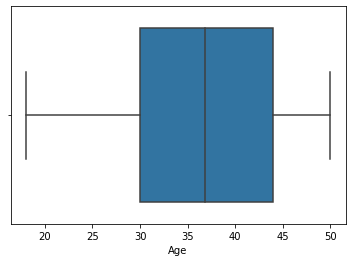

In [ ]:
import seaborn as sns

sns.boxplot(x=dataset["Age"])


<AxesSubplot:xlabel='Age', ylabel='Purchased'>

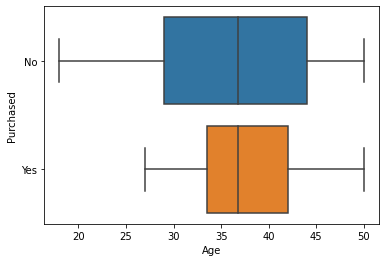

In [ ]:
sns.boxplot(data=dataset, x="Age", y="Purchased")

<AxesSubplot:xlabel='Salary', ylabel='Purchased'>

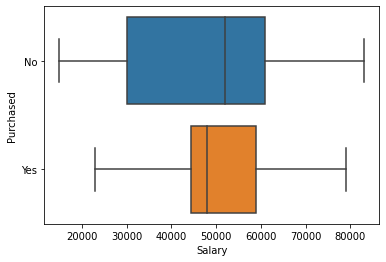

In [ ]:
sns.boxplot(data=dataset, x="Salary", y="Purchased")

In [ ]:
dataset.describe()

,Age,Salary
count,24.000000,24.000000
mean,36.356884,50439.236111
std,8.380018,18515.265682
min,18.000000,15000.000000
25%,30.000000,43750.000000
50%,36.782609,50770.833333
75%,44.000000,60250.000000
max,50.000000,83000.000000


In [ ]:
q1_age = 30
q2_age = 37
q3_age = 44

q1_sal = 43750
q2_sal = 51000
q3_sal = 62500

#dataset.Age.qaurtile(0.25)

In [ ]:
# Find the IQR which is the difference between third and first quartile
iqr_age = q3_age - q1_age
iqr_sal = q3_sal - q1_sal

In [ ]:
# Find lower and upper bound
lower_bound_age = q1_age - (1.5 * iqr_age) 
upper_bound_age = q3_age + (1.5 * iqr_age) 

lower_bound_sal = q1_sal - (1.5 * iqr_sal) 
upper_bound_sal = q3_sal + (1.5 * iqr_sal) 

print('lower bound age:', lower_bound_age)
print('upper bound age:', upper_bound_age)
print('lower bound salary:', lower_bound_sal)
print('upper bound salary:', upper_bound_sal)



lower bound age: 9.0
upper bound age: 65.0
lower bound salary: 15625.0
upper bound salary: 90625.0


* lower bound of age is 9 and upper bound is 65, so anything outside of 9 and 65 is an outlier.
* lower bound of salary is 15625 and upper bound is 90625, so anything outside of 15625 and 90625  is an outlier.

# Handling missing values

In [ ]:
# Imputing missing values on numerical features
print(dataset["Age"].mean()) #or median()
print(dataset["Age"].fillna(dataset["Age"].mean())) #or median()

36.78260869565217
0     44.000000
1     27.000000
2     30.000000
3     38.000000
4     18.000000
5     40.000000
6     35.000000
7     36.782609
8     48.000000
9     50.000000
10    37.000000
11    50.000000
12    22.000000
13    44.000000
14    47.000000
15    35.000000
16    34.000000
17    33.000000
18    29.000000
19    36.782609
20    44.000000
21    37.000000
22    45.000000
23    30.000000
24    29.000000
Name: Age, dtype: float64


In [ ]:
# Imputing missing values on numerical features
print(dataset["Salary"].median())
print(dataset["Salary"].fillna(dataset["Salary"].median()))

51000.0
0     72000.0
1     48000.0
2     54000.0
3     61000.0
4     15000.0
5     51000.0
6     58000.0
7     52000.0
8     79000.0
9     83000.0
10    67000.0
11    60000.0
12    30000.0
13    45000.0
14    78000.0
15    43000.0
16    44000.0
17    48000.0
18    77000.0
19    57000.0
20    48000.0
21    23000.0
22    50000.0
23    30000.0
24    15000.0
Name: Salary, dtype: float64


In [ ]:
# Imputing missing values on categorical features
print(dataset["Country"].fillna("Unknown"))

0      France
1       Spain
2     Germany
3       Spain
4     Nigeria
5     Germany
6      France
7       Spain
8      France
9     Germany
10     France
11    Nigeria
12     France
13    Unknown
14     France
15    Nigeria
16      Spain
17      Spain
18    Nigeria
19      Spain
20     France
21     France
22    Germany
23    Nigeria
24    Nigeria
Name: Country, dtype: object


In [ ]:
print(dataset)

    Country   Age   Salary Purchased
0    France  44.0  72000.0        No
1     Spain  27.0  48000.0       Yes
2   Germany  30.0  54000.0        No
3     Spain  38.0  61000.0        No
4   Nigeria  18.0  15000.0        No
5   Germany  40.0      NaN       Yes
6    France  35.0  58000.0       Yes
7     Spain   NaN  52000.0        No
8    France  48.0  79000.0       Yes
9   Germany  50.0  83000.0        No
10   France  37.0  67000.0       Yes
11  Nigeria  50.0  60000.0       Yes
12   France  22.0  30000.0        No
13      NaN  44.0  45000.0       Yes
14   France  47.0  78000.0       NaN
15  Nigeria  35.0  43000.0       Yes
16    Spain  34.0  44000.0       Yes
17    Spain  33.0  48000.0       Yes
18  Nigeria  29.0  77000.0       Yes
19    Spain   NaN  57000.0       Yes
20   France  44.0  48000.0       Yes
21   France  37.0  23000.0       Yes
22  Germany  45.0  50000.0        No
23  Nigeria  30.0  30000.0       Yes
24  Nigeria  29.0  15000.0        No


In [ ]:
dataset.Country.mode()

0    France
Name: Country, dtype: object

In [ ]:
# Filling missing value on numerical column with mean
dataset = dataset.fillna(dataset.mean())
# Filling missing value on numerical column with mode
dataset["Country"] = dataset["Country"].fillna("France")
# Removing missing value on target variable
dataset.dropna(subset=["Purchased"], inplace = True) 
# Reset index
dataset.reset_index(drop=True, inplace=True)

<ipython-input-30-bbe9b887759c>:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  dataset = dataset.fillna(dataset.mean())


In [ ]:
dataset.head()

,Country,Age,Salary,Purchased
0,France,44.0,72000.0,No
1,Spain,27.0,48000.0,Yes
2,Germany,30.0,54000.0,No
3,Spain,38.0,61000.0,No
4,Nigeria,18.0,15000.0,No


In [ ]:
dataset.isnull().sum()

Country      0
Age          0
Salary       0
Purchased    0
dtype: int64

In [ ]:
dataset.shape

(24, 4)

# Splitting dataset

In [ ]:
# Splitting dataset into independent and dependent variable
X = dataset[['Country', 'Age', 'Salary']]
y = dataset['Purchased'].values
print(X)

    Country        Age        Salary
0    France  44.000000  72000.000000
1     Spain  27.000000  48000.000000
2   Germany  30.000000  54000.000000
3     Spain  38.000000  61000.000000
4   Nigeria  18.000000  15000.000000
5   Germany  40.000000  51541.666667
6    France  35.000000  58000.000000
7     Spain  36.782609  52000.000000
8    France  48.000000  79000.000000
9   Germany  50.000000  83000.000000
10   France  37.000000  67000.000000
11  Nigeria  50.000000  60000.000000
12   France  22.000000  30000.000000
13   France  44.000000  45000.000000
14  Nigeria  35.000000  43000.000000
15    Spain  34.000000  44000.000000
16    Spain  33.000000  48000.000000
17  Nigeria  29.000000  77000.000000
18    Spain  36.782609  57000.000000
19   France  44.000000  48000.000000
20   France  37.000000  23000.000000
21  Germany  45.000000  50000.000000
22  Nigeria  30.000000  30000.000000
23  Nigeria  29.000000  15000.000000


In [ ]:
print(y)

['No' 'Yes' 'No' 'No' 'No' 'Yes' 'Yes' 'No' 'Yes' 'No' 'Yes' 'Yes' 'No'
 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'No' 'Yes' 'No']


# One hot encoding

In [ ]:
# Handling Categorical Data
from sklearn.preprocessing import OneHotEncoder

ct = OneHotEncoder()
Xct = pd.DataFrame(ct.fit_transform(X[["Country"]]).toarray(),
                   columns=ct.get_feature_names_out())
X = pd.concat([X, Xct], axis=1)
X.drop(columns=["Country"], inplace=True)

In [ ]:
X.head()

,Age,Salary,Country_France,Country_Germany,Country_Nigeria,Country_Spain
0,44.0,72000.0,1.0,0.0,0.0,0.0
1,27.0,48000.0,0.0,0.0,0.0,1.0
2,30.0,54000.0,0.0,1.0,0.0,0.0
3,38.0,61000.0,0.0,0.0,0.0,1.0
4,18.0,15000.0,0.0,0.0,1.0,0.0


In [ ]:
#X.drop(columns=["Country_Unknown"], inplace=True)

In [ ]:
print(X)

          Age        Salary  Country_France  Country_Germany  Country_Nigeria  \
0   44.000000  72000.000000             1.0              0.0              0.0   
1   27.000000  48000.000000             0.0              0.0              0.0   
2   30.000000  54000.000000             0.0              1.0              0.0   
3   38.000000  61000.000000             0.0              0.0              0.0   
4   18.000000  15000.000000             0.0              0.0              1.0   
5   40.000000  51541.666667             0.0              1.0              0.0   
6   35.000000  58000.000000             1.0              0.0              0.0   
7   36.782609  52000.000000             0.0              0.0              0.0   
8   48.000000  79000.000000             1.0              0.0              0.0   
9   50.000000  83000.000000             0.0              1.0              0.0   
10  37.000000  67000.000000             1.0              0.0              0.0   
11  50.000000  60000.000000 

In [ ]:
# Dummies (One hot encoding using pandas)
pd.get_dummies(dataset.drop(columns = ["Purchased"]))

,Age,Salary,Country_France,Country_Germany,Country_Nigeria,Country_Spain
0,44.000000,72000.000000,1,0,0,0
1,27.000000,48000.000000,0,0,0,1
2,30.000000,54000.000000,0,1,0,0
3,38.000000,61000.000000,0,0,0,1
4,18.000000,15000.000000,0,0,1,0
5,40.000000,51541.666667,0,1,0,0
6,35.000000,58000.000000,1,0,0,0
7,36.782609,52000.000000,0,0,0,1
8,48.000000,79000.000000,1,0,0,0
9,50.000000,83000.000000,0,1,0,0


# Label encoding

In [ ]:
print(y)

['No' 'Yes' 'No' 'No' 'No' 'Yes' 'Yes' 'No' 'Yes' 'No' 'Yes' 'Yes' 'No'
 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'No' 'Yes' 'No']


In [ ]:
# Encoding the target variable
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

In [ ]:
print(y)

[0 1 0 0 0 1 1 0 1 0 1 1 0 1 1 1 1 1 1 1 1 0 1 0]


In [ ]:
# Splitting Dataset into Training and Testing Set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [ ]:
print(X_train)

          Age        Salary  Country_France  Country_Germany  Country_Nigeria  \
16  33.000000  48000.000000             0.0              0.0              0.0   
3   38.000000  61000.000000             0.0              0.0              0.0   
12  22.000000  30000.000000             1.0              0.0              0.0   
9   50.000000  83000.000000             0.0              1.0              0.0   
4   18.000000  15000.000000             0.0              0.0              1.0   
10  37.000000  67000.000000             1.0              0.0              0.0   
5   40.000000  51541.666667             0.0              1.0              0.0   
17  29.000000  77000.000000             0.0              0.0              1.0   
1   27.000000  48000.000000             0.0              0.0              0.0   
2   30.000000  54000.000000             0.0              1.0              0.0   
7   36.782609  52000.000000             0.0              0.0              0.0   
20  37.000000  23000.000000 

In [ ]:
print(X_test)

     Age   Salary  Country_France  Country_Germany  Country_Nigeria  \
21  45.0  50000.0             0.0              1.0              0.0   
0   44.0  72000.0             1.0              0.0              0.0   
22  30.0  30000.0             0.0              0.0              1.0   
6   35.0  58000.0             1.0              0.0              0.0   
14  35.0  43000.0             0.0              0.0              1.0   

    Country_Spain  
21            0.0  
0             0.0  
22            0.0  
6             0.0  
14            0.0  


In [ ]:
print(y_train)

[1 0 0 0 0 1 1 1 1 0 0 1 1 1 1 0 1 1 1]


In [ ]:
print(y_test)

[0 0 1 1 1]


# Feature scaling

In [ ]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler, MinMaxScaler
sc = StandardScaler()
mm = MinMaxScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
print(X_train)

[[-0.34254227 -0.12587571 -0.67936622 -0.4330127  -0.51639778  1.47196014]
 [ 0.23274971  0.55682441 -0.67936622 -0.4330127  -0.51639778  1.47196014]
 [-1.60818464 -1.07115281  1.47196014 -0.4330127  -0.51639778 -0.67936622]
 [ 1.61345047  1.71216308 -0.67936622  2.30940108 -0.51639778 -0.67936622]
 [-2.06841822 -1.85888372 -0.67936622 -0.4330127   1.93649167 -0.67936622]
 [ 0.11769131  0.87191677  1.47196014 -0.4330127  -0.51639778 -0.67936622]
 [ 0.4628665   0.06011631 -0.67936622  2.30940108 -0.51639778 -0.67936622]
 [-0.80277586  1.39707071 -0.67936622 -0.4330127   1.93649167 -0.67936622]
 [-1.03289265 -0.12587571 -0.67936622 -0.4330127  -0.51639778  1.47196014]
 [-0.68771746  0.18921665 -0.67936622  2.30940108 -0.51639778 -0.67936622]
 [ 0.09267862  0.08418586 -0.67936622 -0.4330127  -0.51639778  1.47196014]
 [ 0.11769131 -1.43876057  1.47196014 -0.4330127  -0.51639778 -0.67936622]
 [ 0.92310009 -0.12587571  1.47196014 -0.4330127  -0.51639778 -0.67936622]
 [ 0.09267862  0.34676283

In [ ]:
print(X_test)

[[ 1.03815848 -0.02084493 -0.67936622  2.30940108 -0.51639778 -0.67936622]
 [ 0.92310009  1.13449374  1.47196014 -0.4330127  -0.51639778 -0.67936622]
 [-0.68771746 -1.07115281 -0.67936622 -0.4330127   1.93649167 -0.67936622]
 [-0.11242548  0.39927823  1.47196014 -0.4330127  -0.51639778 -0.67936622]
 [-0.11242548 -0.38845268 -0.67936622 -0.4330127   1.93649167 -0.67936622]]


In [ ]:
#Normalization or Standarization?
#Normalization = Does not follow Gaussian distribution, impact outliers, Not for KNN (Algorithm not assume any distribution), for Neural Network, Image processing, etc.
#Standarization = Follow Gaussian distribution, does not impact outliers

In [ ]:
#When to scale your data?
#Gradient Based Algorithm = Bayes, Neural Network, etc.
#Distance-Based algorithm = KNN, K-Means, SVM, etc

In [ ]:
#When to not scale your data?
#Tree-Based Algorithm = Decision Tree, Random Forest